In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# Load The Data from CSV to pandas format
data = pd.read_csv('/home/pankaj/Documents/code/Fertilizers/FertilizersProduct.csv',encoding='ISO-8859-1')

def millify(n):
        millnames = ['',' Thousand',' Million',' Billion',' Trillion']
        n = float(n)
        millidx = max(0,min(len(millnames)-1,
                            int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

        return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])    

In [2]:
data.Element.value_counts()

Import Quantity     45709
Import Value        45666
Export Quantity     25452
Export Value        25425
Agricultural Use    14528
Production           7688
Name: Element, dtype: int64

In [3]:
class Fertlizerscountry:
    def __init__(self,country,data):
        self.country = country
        self.data = data
    def UniqueArea(self):
        # Counting All the Country In dataset
        self.unique = data["Area"].nunique()
        return self.unique
    
    def CountryData(self):
        self.Country_data = self.data.loc[self.data.Area == self.country] #seprate the data 
        self.data = data.loc[self.data.Area != self.country]
        # Drop irrelevant columns
        self.Country_data.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],inplace=True,axis=1)
        return pd.DataFrame(self.Country_data.head())
        
    def ValueCounts(self):
        self.Country_data = data.loc[data.Area == self.country] #seprate the data 
        # Drop irrelevant columns
        self.Country_data.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],inplace=True,axis=1)
        return self.Country_data.Element.value_counts()
        
    def Totalitemincountry(self):
        self.Country_data = data.loc[data.Area == self.country] #seprate the data 
        # Drop irrelevant columns
        self.Country_data.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],inplace=True,axis=1)
        return self.Country_data.Item.value_counts()
        
    def TotalItemInWorld(self):
        return self.data.Item.value_counts()
    
    def TotalUniqueItemInWorld(self):
        return self.data.Item.nunique()
    def TotalUniqueItemInCountry(self):
        self.Country_data = data.loc[data.Area == self.country]
        return self.Country_data.Item.nunique()
    def AgricultralUsagesInCountry(self):
        self.Country_data = data.loc[data.Area == self.country] #seprate the data 
        # Drop irrelevant columns
        self.Country_data.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],inplace=True,axis=1)
        agr_usage = self.Country_data.loc[self.Country_data.Element == 'Agricultural Use']
        agr_usage.sort_values(by=['Value'], ascending=False).head()
        plt.figure(figsize=(25,25))
        sns.barplot(x='Year',y='Value',hue='Item',data=agr_usage)
        plt.figure(figsize=(20,15))
        sns.lineplot(x= 'Year',y = 'Value',hue = 'Item',data=agr_usage)
        plt.show()
        
    def TotalUsageInOneYear(self):
        print('Total Agricultural Use in 2017 of whole world¶')
        usage_global = self.data.loc[(self.data.Element == 'Agricultural Use')  & (self.data.Year == 2017)]
        countries = self.data.Area.unique()
        cdf = []
        adf = []
        for country in countries:
            df_aux = usage_global.loc[usage_global.Area == country]
            amount = df_aux.Value.sum()
            cdf.append(country)
            adf.append(amount)
        df_fert = pd.DataFrame({'Country': cdf, 'Amount': adf})
        df_fert = df_fert.sort_values(by=['Amount'], ascending=False)
        plt.figure(figsize=(25,25))
        sns.barplot(data= df_fert.iloc[:15,:],x = "Country",y = 'Amount')
        plt.show()
        
        
    def ProductionExport(self):
        print(f'Production And Export in {self.country}')
        self.Country_data = data.loc[data.Area == self.country] #seprate the data 
        # Drop irrelevant columns
        self.Country_data.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],inplace=True,axis=1)
        fert_prod = self.Country_data.loc[self.Country_data.Element == 'Production']
        fert_prod.sort_values(by=['Value'], ascending=False).head()
        if len(fert_prod)!= 0:
            plt.figure(figsize=(10,10))
            sns.barplot(data= fert_prod.iloc[:,:10],y = "Item",x = 'Value')
            plt.title(f'Total Production of Fertilizers in {self.country}')
            plt.show()
            
        fert_expo = self.Country_data.loc[self.Country_data.Element == 'Export Quantity']
        fert_expo.sort_values(by=['Value'], ascending=False).head()
        plt.figure(figsize=(10,10))
        sns.barplot(data= fert_expo.iloc[:,:10],y = "Item",x = 'Value')
        plt.title(f'Total Export of Fertilizers in {self.country}')
        plt.show()
        
        fert_impo = self.Country_data.loc[self.Country_data.Element == 'Import Quantity']
        fert_expo.sort_values(by=['Value'], ascending=False).head()
        plt.figure(figsize=(10,10))
        sns.barplot(data= fert_expo.iloc[:,:10],y = "Item",x = 'Value')
        plt.title(f'Total Import of Fertilizers in {self.country}')
        plt.show()
        
    def Urea(self):
        print(f'Total Production of Urea in {self.country}')
        self.Country_data = data.loc[data.Area == self.country] #seprate the data 
        # Drop irrelevant columns
        self.Country_data.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],inplace=True,axis=1)
        
        urea_prod = self.Country_data.loc[(self.Country_data.Item == 'Urea') & (self.Country_data.Element == 'Production')]
        plt.figure(figsize=(10,10))
        sns.barplot(data = urea_prod, x="Year", y="Value", label=f'Production of Urea in {self.country} (x1000 US$)')
        plt.legend()
        plt.show()
        total = urea_prod['Value'].sum()
        urea_prod_value = total
        print (f'{self.country} produced {millify(total*1000)} US$ of Urea\n')
        
        print(f'Total Export of urea in {self.country}')
        self.Country_data = data.loc[data.Area == self.country] #seprate the data 
        # Drop irrelevant columns
        self.Country_data.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],inplace=True,axis=1)
        
        urea_export = self.Country_data.loc[(self.Country_data.Item == 'Urea') & (self.Country_data.Element == 'Export Value')]
        plt.figure(figsize=(10,10))
        sns.barplot(data = urea_export, x="Year", y="Value", label=f'Exportation of Urea in {self.country} (x1000 US$)')
        plt.legend()
        plt.show()
        total = urea_export['Value'].sum()
        urea_export_value = total
        print (f'{self.country} exported US$ {millify(total*1000)} of Urea\n')
        print('*'*100)
        print()
        print(f'Total import of urea in {self.country}')
        urea_import = self.Country_data.loc[(self.Country_data.Item == 'Urea') & (self.Country_data.Element == 'Import Value')]
        plt.figure(figsize=(10,10))
        sns.barplot(data = urea_import, x="Year", y="Value", label=f'Exportation of Urea in {self.country} (x1000 US$)')
        plt.legend()
        plt.show()
        total = urea_import['Value'].sum()
        urea_import_value = total
        print (f'{self.country} imported {millify(total*1000)} US$ of Urea\n')
        print(f'Total Business loss for {self.country} in Urea\n')
        print(millify((urea_import_value-urea_export_value)*1000))
        
        
    def CountryFertilizers(self):
        print(f'Total Production of Fertilizers in {self.country}\n')
        self.Country_data = data.loc[data.Area == self.country] #seprate the data 
        # Drop irrelevant columns
        self.Country_data.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],inplace=True,axis=1)
        prod_value = self.Country_data.loc[(self.Country_data.Element == 'Production')]
        total = prod_value['Value'].sum()
        print (f'{self.country} produced  {millify(total*1000)} tons of total fertilizers\n')
        print('*'*100)
        print(f'Total Export of Fertilizers in {self.country}\n')
        total_export = self.Country_data.loc[(self.Country_data.Element == 'Export Value')]
        india_export = total_export['Value'].sum()
        #total = {millify(total*1000)}
        print (f'{self.country} exported US$ {millify(india_export*1000)} of total fertilizers\n')
        print('*'*100)
        print(f'Total Import of Fertilizers in {self.country}\n')
        total_import = self.Country_data.loc[(self.Country_data.Element == 'Import Value')]
        india_import = total_import['Value'].sum()
        print (f'{self.country} imported US$ {millify(india_import*1000)} of total fertilizers\n')
        print('*'*100)
        print(f'Total Business loss for {self.country} in Fertilizers\n')
        print(millify((india_import-india_export)*1000))
        
        
    def Export_In_World(self):
        self.Country_data = data.loc[data.Area == self.country] #seprate the data 
        # Drop irrelevant columns
        self.Country_data.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],inplace=True,axis=1)
        total_export = self.Country_data.loc[(self.Country_data.Element == 'Export Value')]
        india_export = total_export['Value'].sum()
       
        print('Total Export of Fertilizers in World Label\n')
        total_export_world = self.data.loc[(data.Element == 'Export Value')]
        world_export = total_export_world['Value'].sum()
        #world_export = {millify(total*1000)}
        print (f'Whole World exported US$ {millify(world_export*1000)} of total fertilizers\n')
        print('*'*100)
        print(f'Total shared percentage of {self.country} on world label in export\n')
        shared_export = round((india_export/world_export)*100,2)

        print(f'Total shared percentage of {self.country} in export on world label: {shared_export}%\n')
        plt.pie(x = [world_export,india_export],labels = ['Total Fertilizers Exported by World',f"Total Fertilizers Exported by {self.country} "],shadow=True,labeldistance=1.1,startangle=None,radius=2,autopct= '%.2f%%')
        plt.show()
        
    def Import_In_World(self):
        self.Country_data = data.loc[data.Area == self.country] #seprate the data 
        # Drop irrelevant columns
        self.Country_data.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],inplace=True,axis=1)
        total_import = self.Country_data.loc[(self.Country_data.Element == 'Import Value')]
        india_import = total_import['Value'].sum()
       
        print('Total Export of Fertilizers in World Label\n')
        total_import_world = self.data.loc[(self.data.Element == 'Import Value')]
        world_import = total_import_world['Value'].sum()
        #world_export = {millify(total*1000)}
        print (f'Whole World imported US$ {millify(world_import*1000)} of total fertilizers\n')
        print('*'*100)
        print(f'Total shared percentage of {self.country} on world label in Import\n')
        shared_export = round((india_import/world_import)*100,2)

        print(f'Total shared percentage of {self.country} in import on world label: {shared_export}%\n')
        plt.pie(x = [world_import,india_import],labels = ['Total Fertilizers Imported by World',f"Total Fertilizers Imported by {self.country} "],shadow=True,labeldistance=1.1,startangle=None,radius=2,autopct= '%.2f%%')
        plt.show()

In [4]:
x = Fertlizerscountry('Brazil',data)

In [5]:
x.UniqueArea()


171

In [6]:
x.CountryData()


,Area,Item,Element,Year,Unit,Value
18575,Brazil,"Ammonia, anhydrous",Production,2002,tonnes,1248009.0
18576,Brazil,"Ammonia, anhydrous",Production,2003,tonnes,1143059.0
18577,Brazil,"Ammonia, anhydrous",Production,2004,tonnes,1301483.0
18578,Brazil,"Ammonia, anhydrous",Production,2005,tonnes,1301083.0
18579,Brazil,"Ammonia, anhydrous",Production,2006,tonnes,1315421.0


In [7]:
x.ValueCounts()


Import Quantity     328
Import Value        328
Export Value        322
Export Quantity     322
Agricultural Use    252
Production          227
Name: Element, dtype: int64

In [8]:
x.Totalitemincountry()


Urea                                                                        96
Potassium chloride (muriate of potash) (MOP)                                96
Ammonium sulphate                                                           96
Ammonium nitrate (AN)                                                       96
Monoammonium phosphate (MAP)                                                96
Superphosphates above 35%                                                   95
Other NP compounds                                                          92
Diammonium phosphate (DAP)                                                  91
Phosphate rock                                                              86
Ammonia, anhydrous                                                          86
Potassium sulphate (sulphate of potash) (SOP)                               85
NPK fertilizers                                                             79
Potassium nitrate                                   

In [9]:
x.TotalItemInWorld()


Urea                                                                        10395
NPK fertilizers                                                             10066
Ammonium sulphate                                                            8958
Other nitrogenous fertilizers, n.e.c.                                        8876
Potassium chloride (muriate of potash) (MOP)                                 8755
Fertilizers n.e.c.                                                           8712
Ammonium nitrate (AN)                                                        8642
Other NP compounds                                                           8408
Diammonium phosphate (DAP)                                                   7716
Potassium sulphate (sulphate of potash) (SOP)                                7653
Potassium nitrate                                                            7513
Ammonia, anhydrous                                                           7426
Monoammonium pho

In [10]:
x.TotalUniqueItemInCountry()
#

23

In [11]:
x.TotalUniqueItemInWorld()
#

23

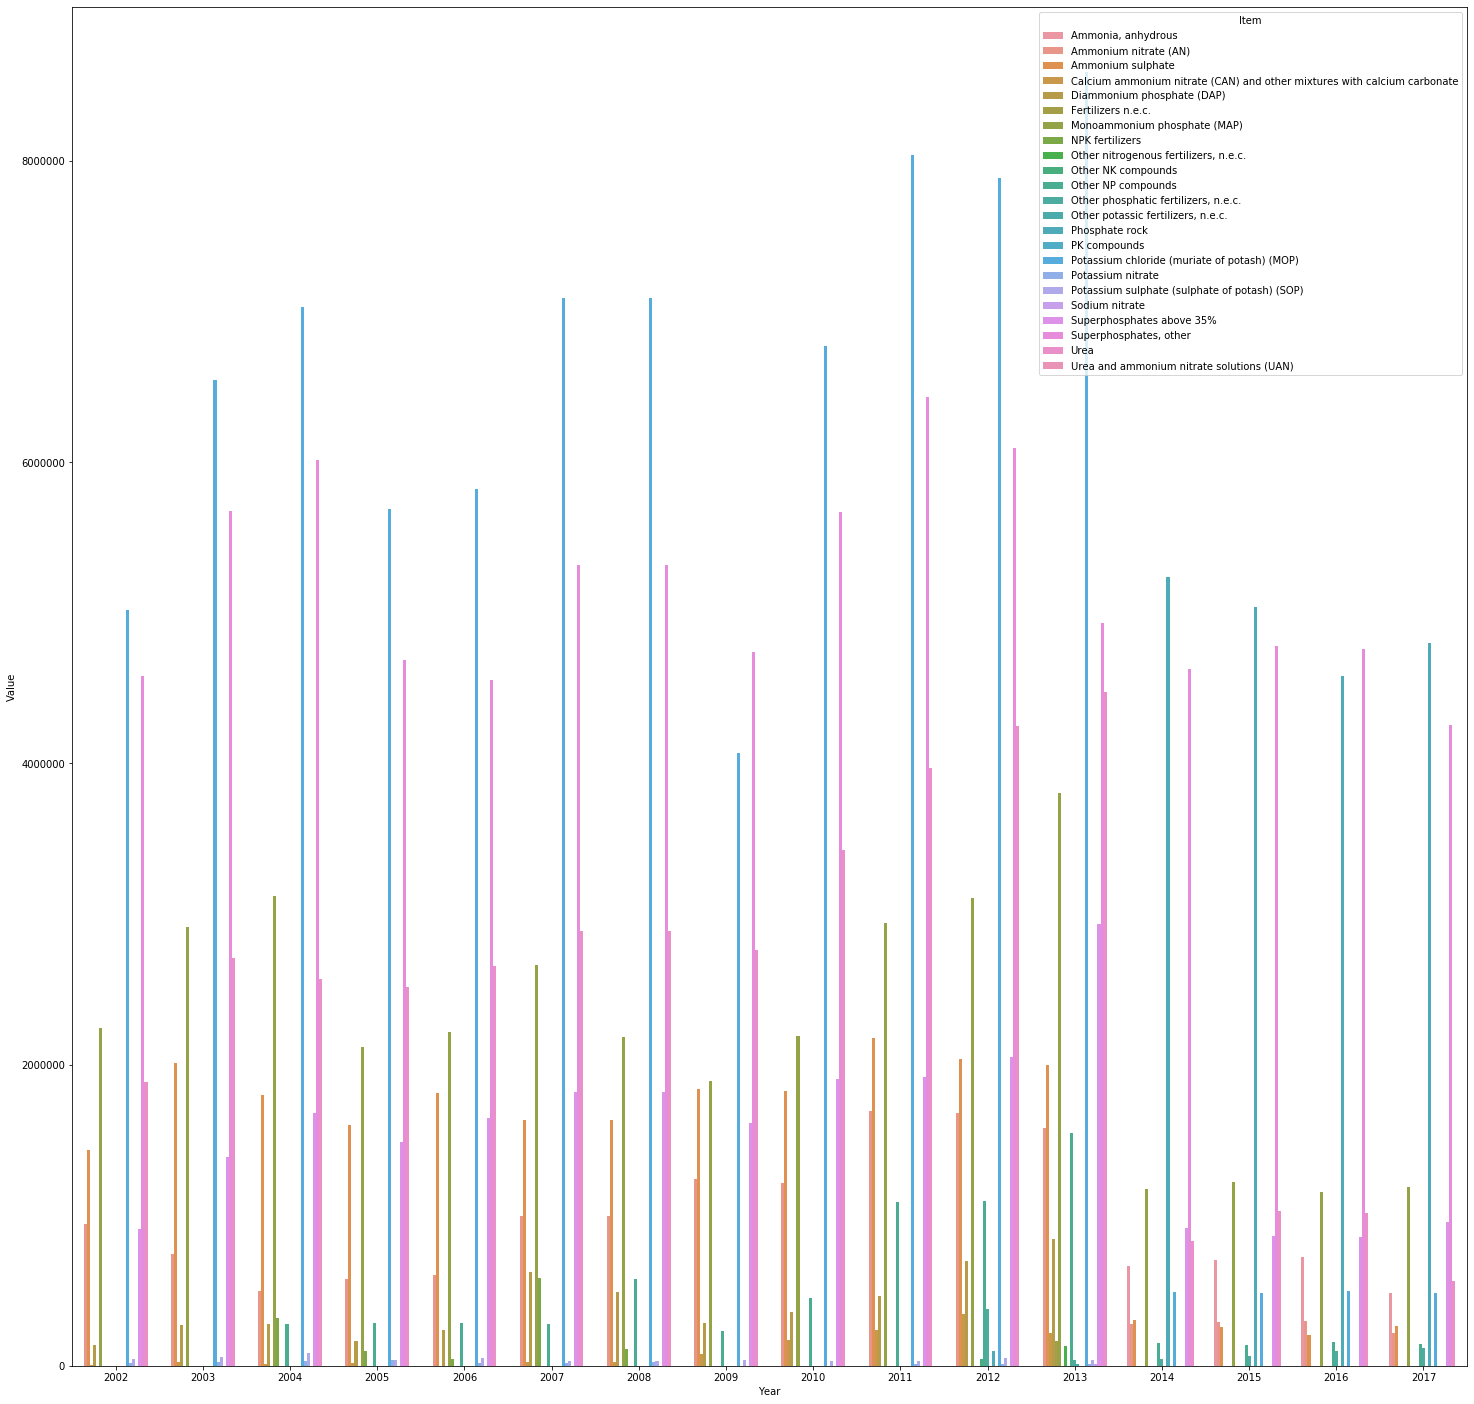

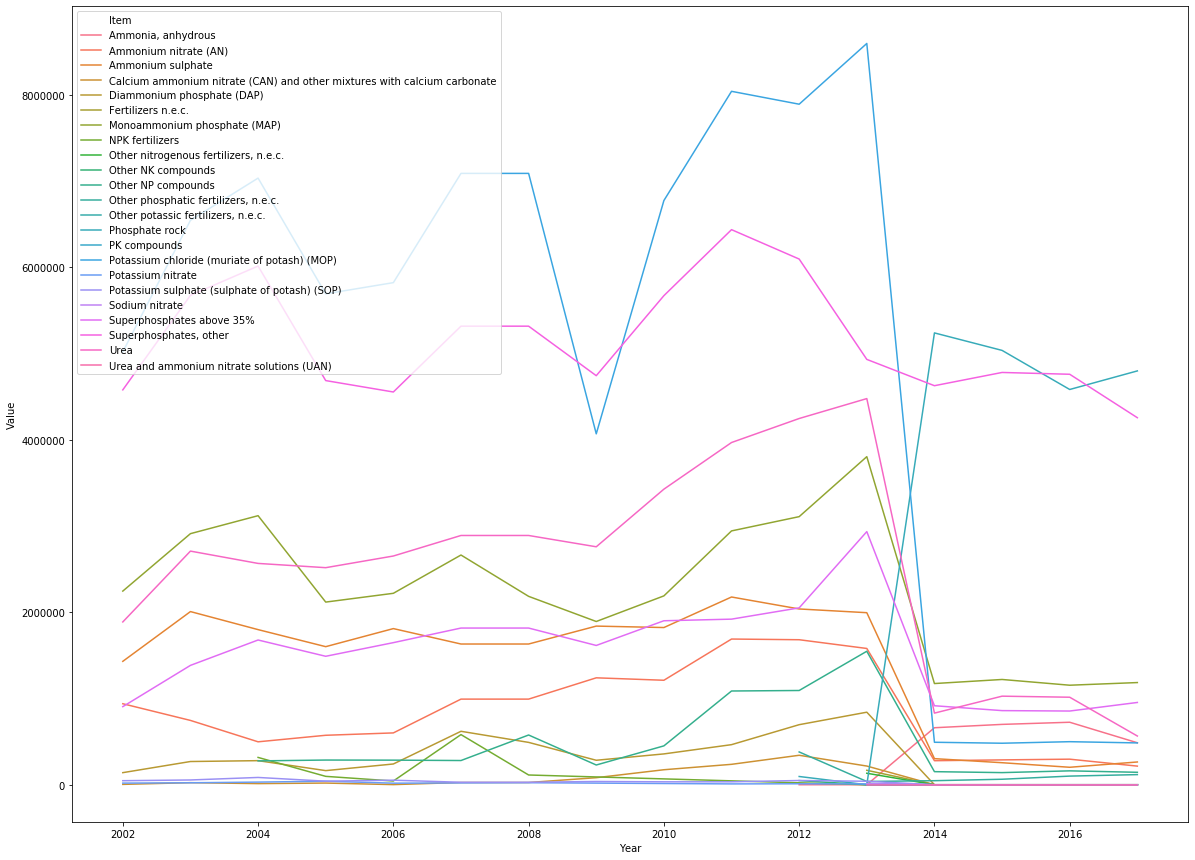

In [12]:
x.AgricultralUsagesInCountry()
#

Total Agricultural Use in 2017 of whole world¶


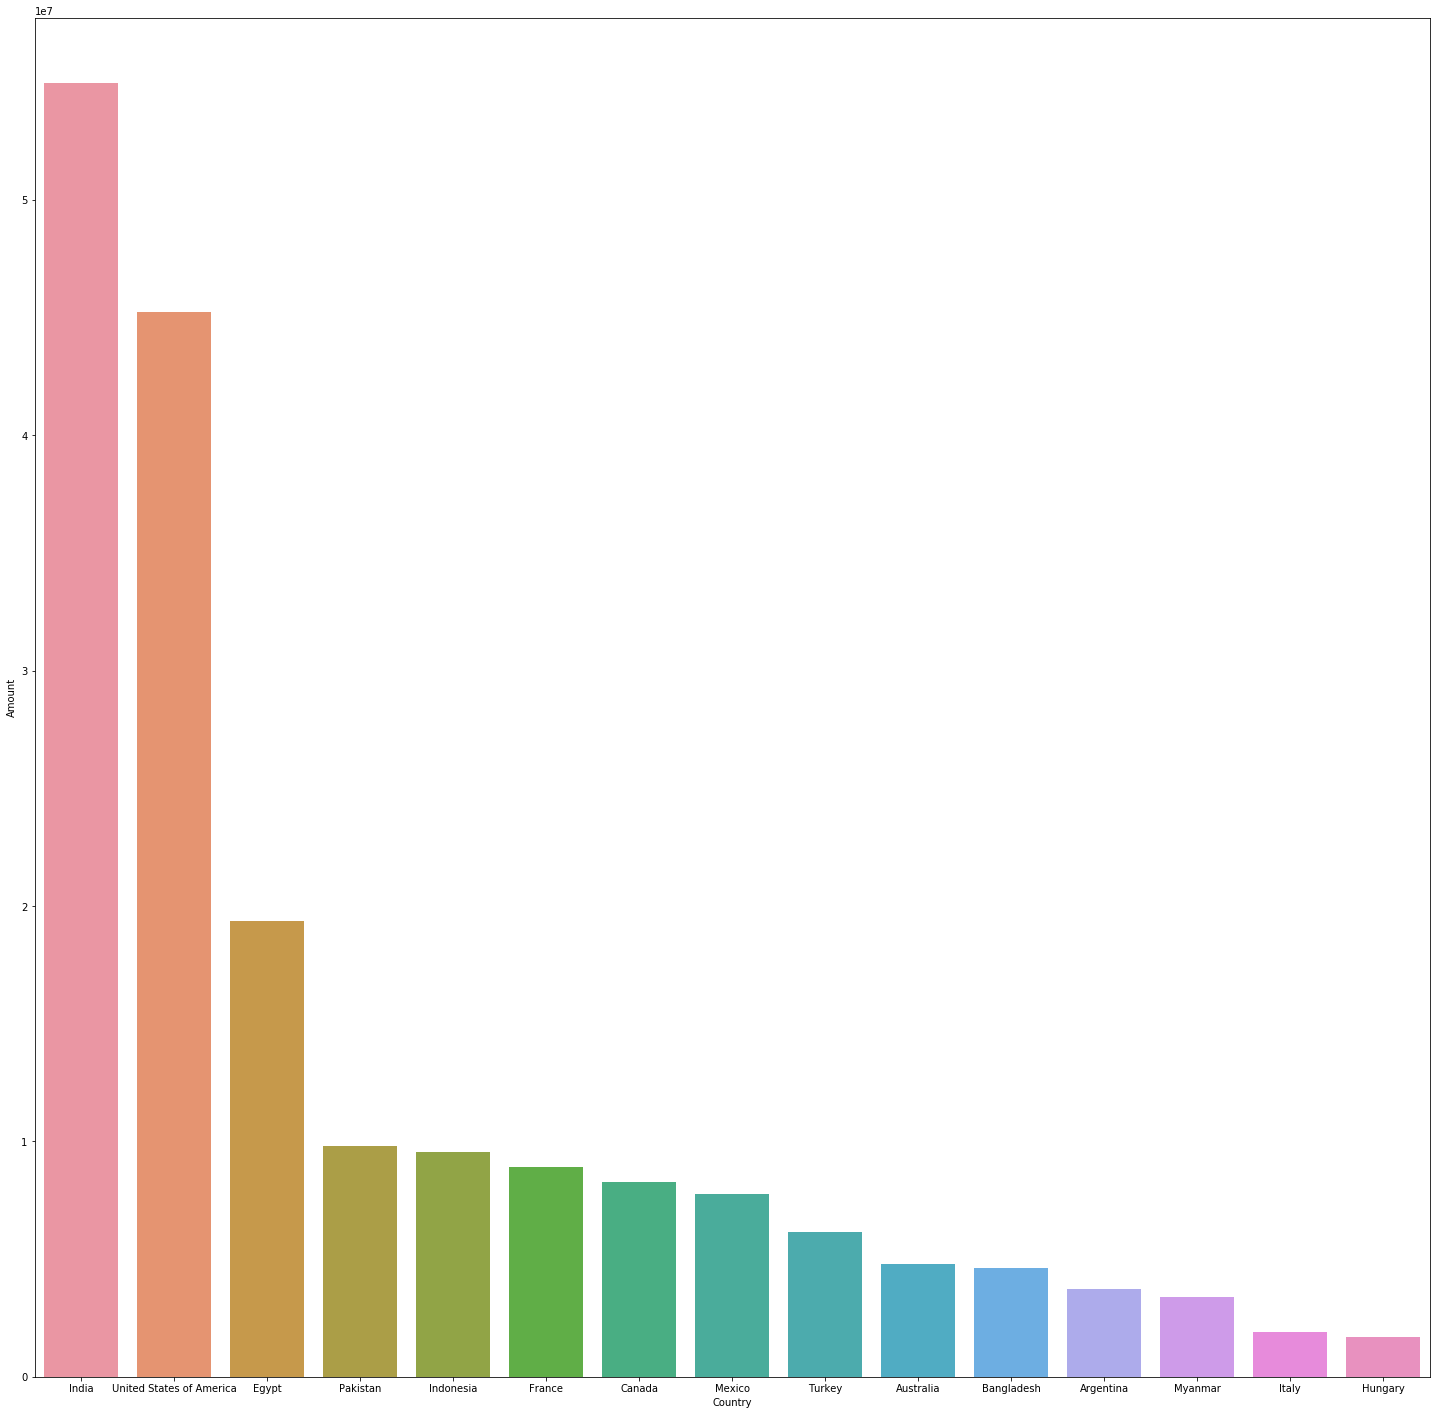

In [13]:
x.TotalUsageInOneYear()


Production And Export in Brazil


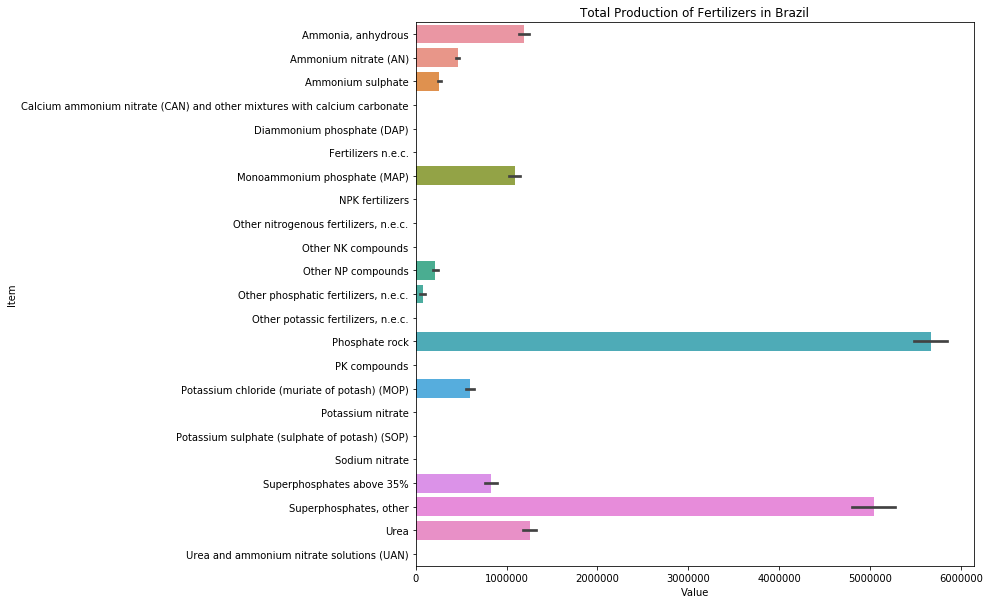

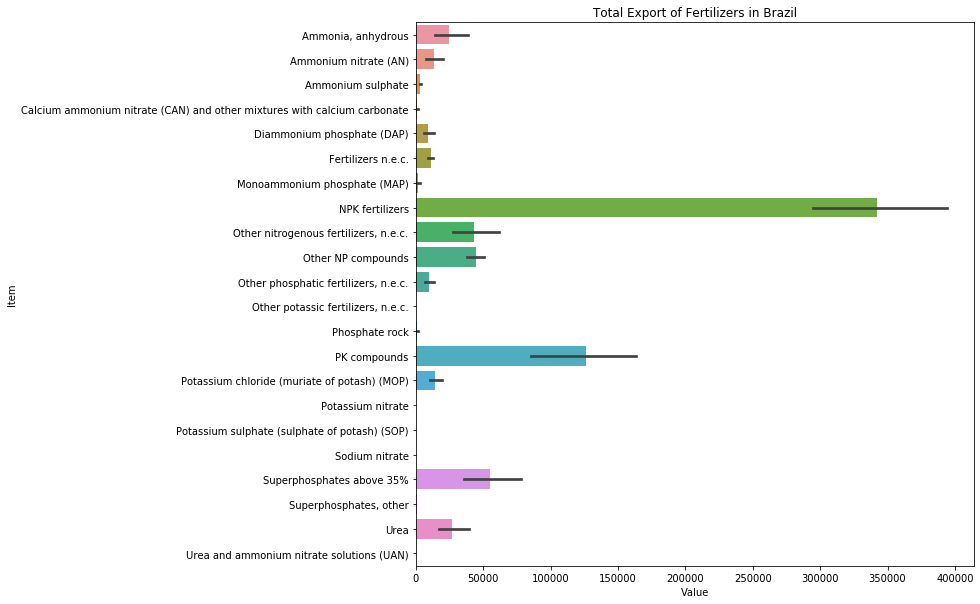

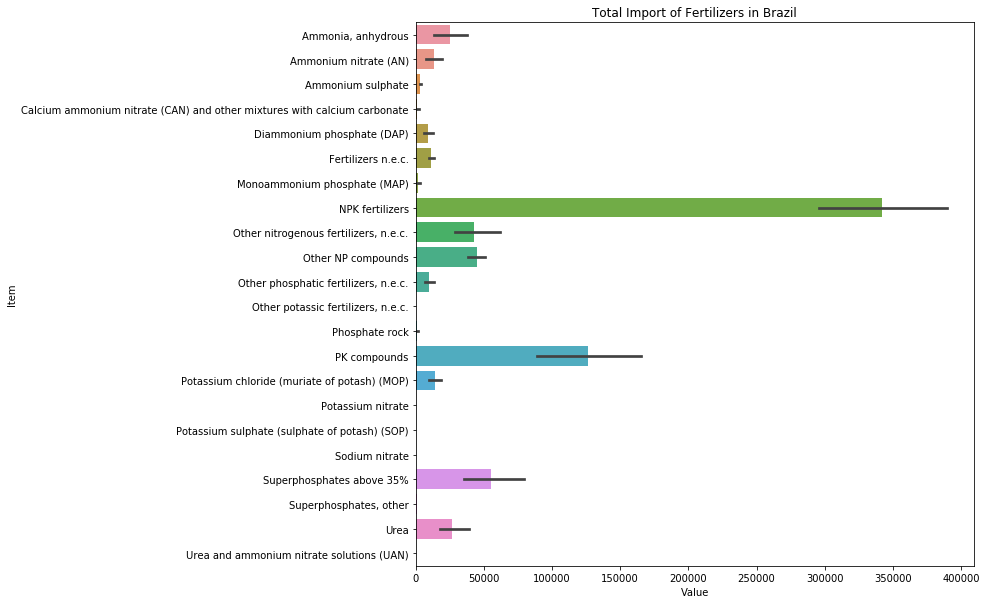

In [14]:
x.ProductionExport()


Total Production of Urea in Brazil


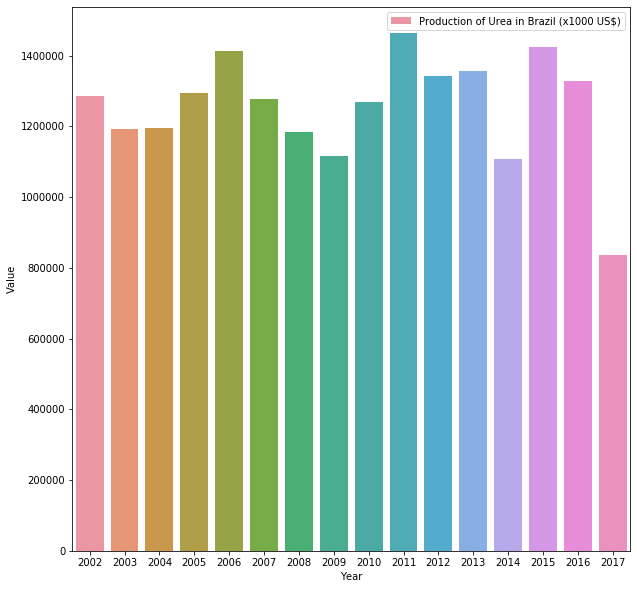

Brazil produced 20 Billion US$ of Urea

Total Export of urea in Brazil


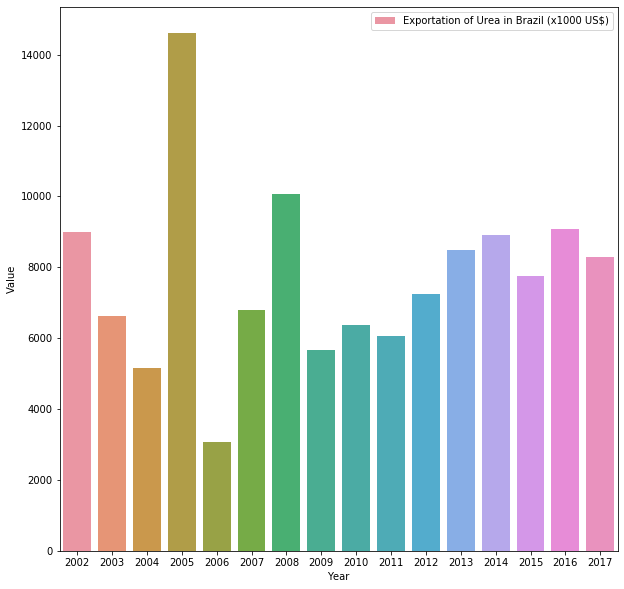

Brazil exported US$ 123 Million of Urea

****************************************************************************************************

Total import of urea in Brazil


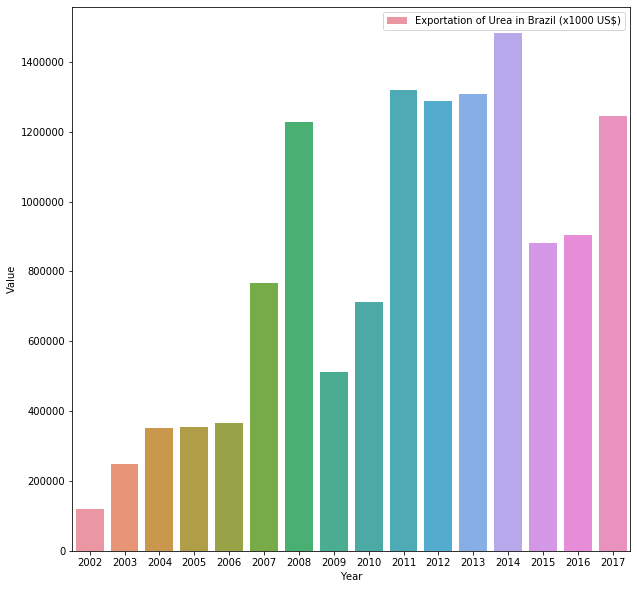

Brazil imported 13 Billion US$ of Urea

Total Business loss for Brazil in Urea

13 Billion


In [15]:
x.Urea()


In [16]:
x.CountryFertilizers()


Total Production of Fertilizers in Brazil

Brazil produced  260 Billion tons of total fertilizers

****************************************************************************************************
Total Export of Fertilizers in Brazil

Brazil exported US$ 4 Billion of total fertilizers

****************************************************************************************************
Total Import of Fertilizers in Brazil

Brazil imported US$ 92 Billion of total fertilizers

****************************************************************************************************
Total Business loss for Brazil in Fertilizers

88 Billion


Total Export of Fertilizers in World Label

Whole World exported US$ 921 Billion of total fertilizers

****************************************************************************************************
Total shared percentage of Brazil on world label in export

Total shared percentage of Brazil in export on world label: 0.47%



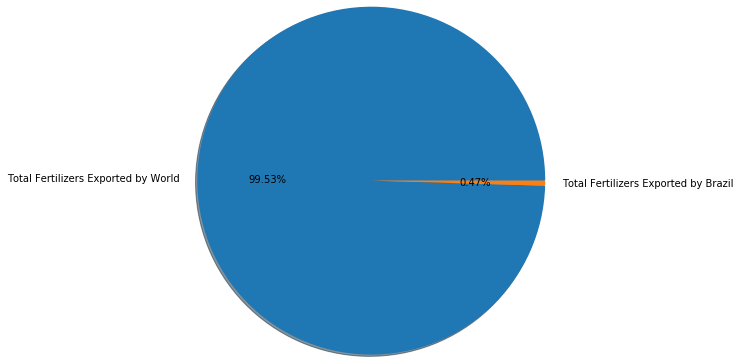

In [17]:
x.Export_In_World()
#x.Import_In_World()

Total Export of Fertilizers in World Label

Whole World imported US$ 925 Billion of total fertilizers

****************************************************************************************************
Total shared percentage of Brazil on world label in Import

Total shared percentage of Brazil in import on world label: 9.95%



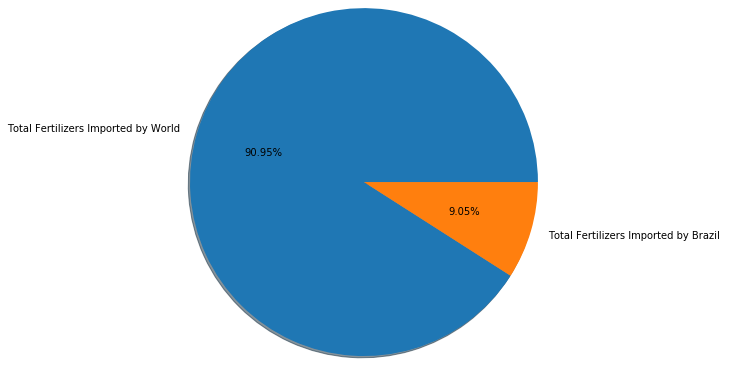

In [18]:

x.Import_In_World()